# Submitted By Bilal Ejaz

In [79]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# New Section

In [80]:
# read dataset
df = pd.read_csv('/content/notebook_18_pulsar_stars.csv')



In [81]:
# view dimensions of dataset
df.shape


(17898, 9)

In [82]:
# let's preview the dataset

df.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [83]:
# view the column names of the dataframe

df.columns

Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

In [84]:
# rename column names
#I will rename the column name with my name

dfcol = {' Mean of the integrated profile': 'B',
               ' Standard deviation of the integrated profile': 'I',
               ' Excess kurtosis of the integrated profile': 'L',
               ' Skewness of the integrated profile': 'A',
               ' Mean of the DM-SNR curve': 'l',
               ' Standard deviation of the DM-SNR curve': 'E',
               ' Excess kurtosis of the DM-SNR curve': 'J',
               ' Skewness of the DM-SNR curve': 'a',
               'target_class': 'Z'}


df.rename(columns=dfcol, inplace=True)


df.columns



Index(['B', 'I', 'L', 'A', 'l', 'E', 'J', 'a', 'Z'], dtype='object')

In [85]:
# check distribution of target_class column

distribution = df['Z'].value_counts()

distribution



0    16259
1     1639
Name: Z, dtype: int64

In [86]:
# check for missing values in variables

df.isnull().sum()


B    0
I    0
L    0
A    0
l    0
E    0
J    0
a    0
Z    0
dtype: int64

In [87]:
# view summary statistics in numerical variables
df.describe()


,B,I,L,A,l,E,J,a,Z
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709,0.091574
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540,0.288432
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504,0.000000
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556,0.000000
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309330,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392141,110.642211,34.539844,1191.000837,1.000000


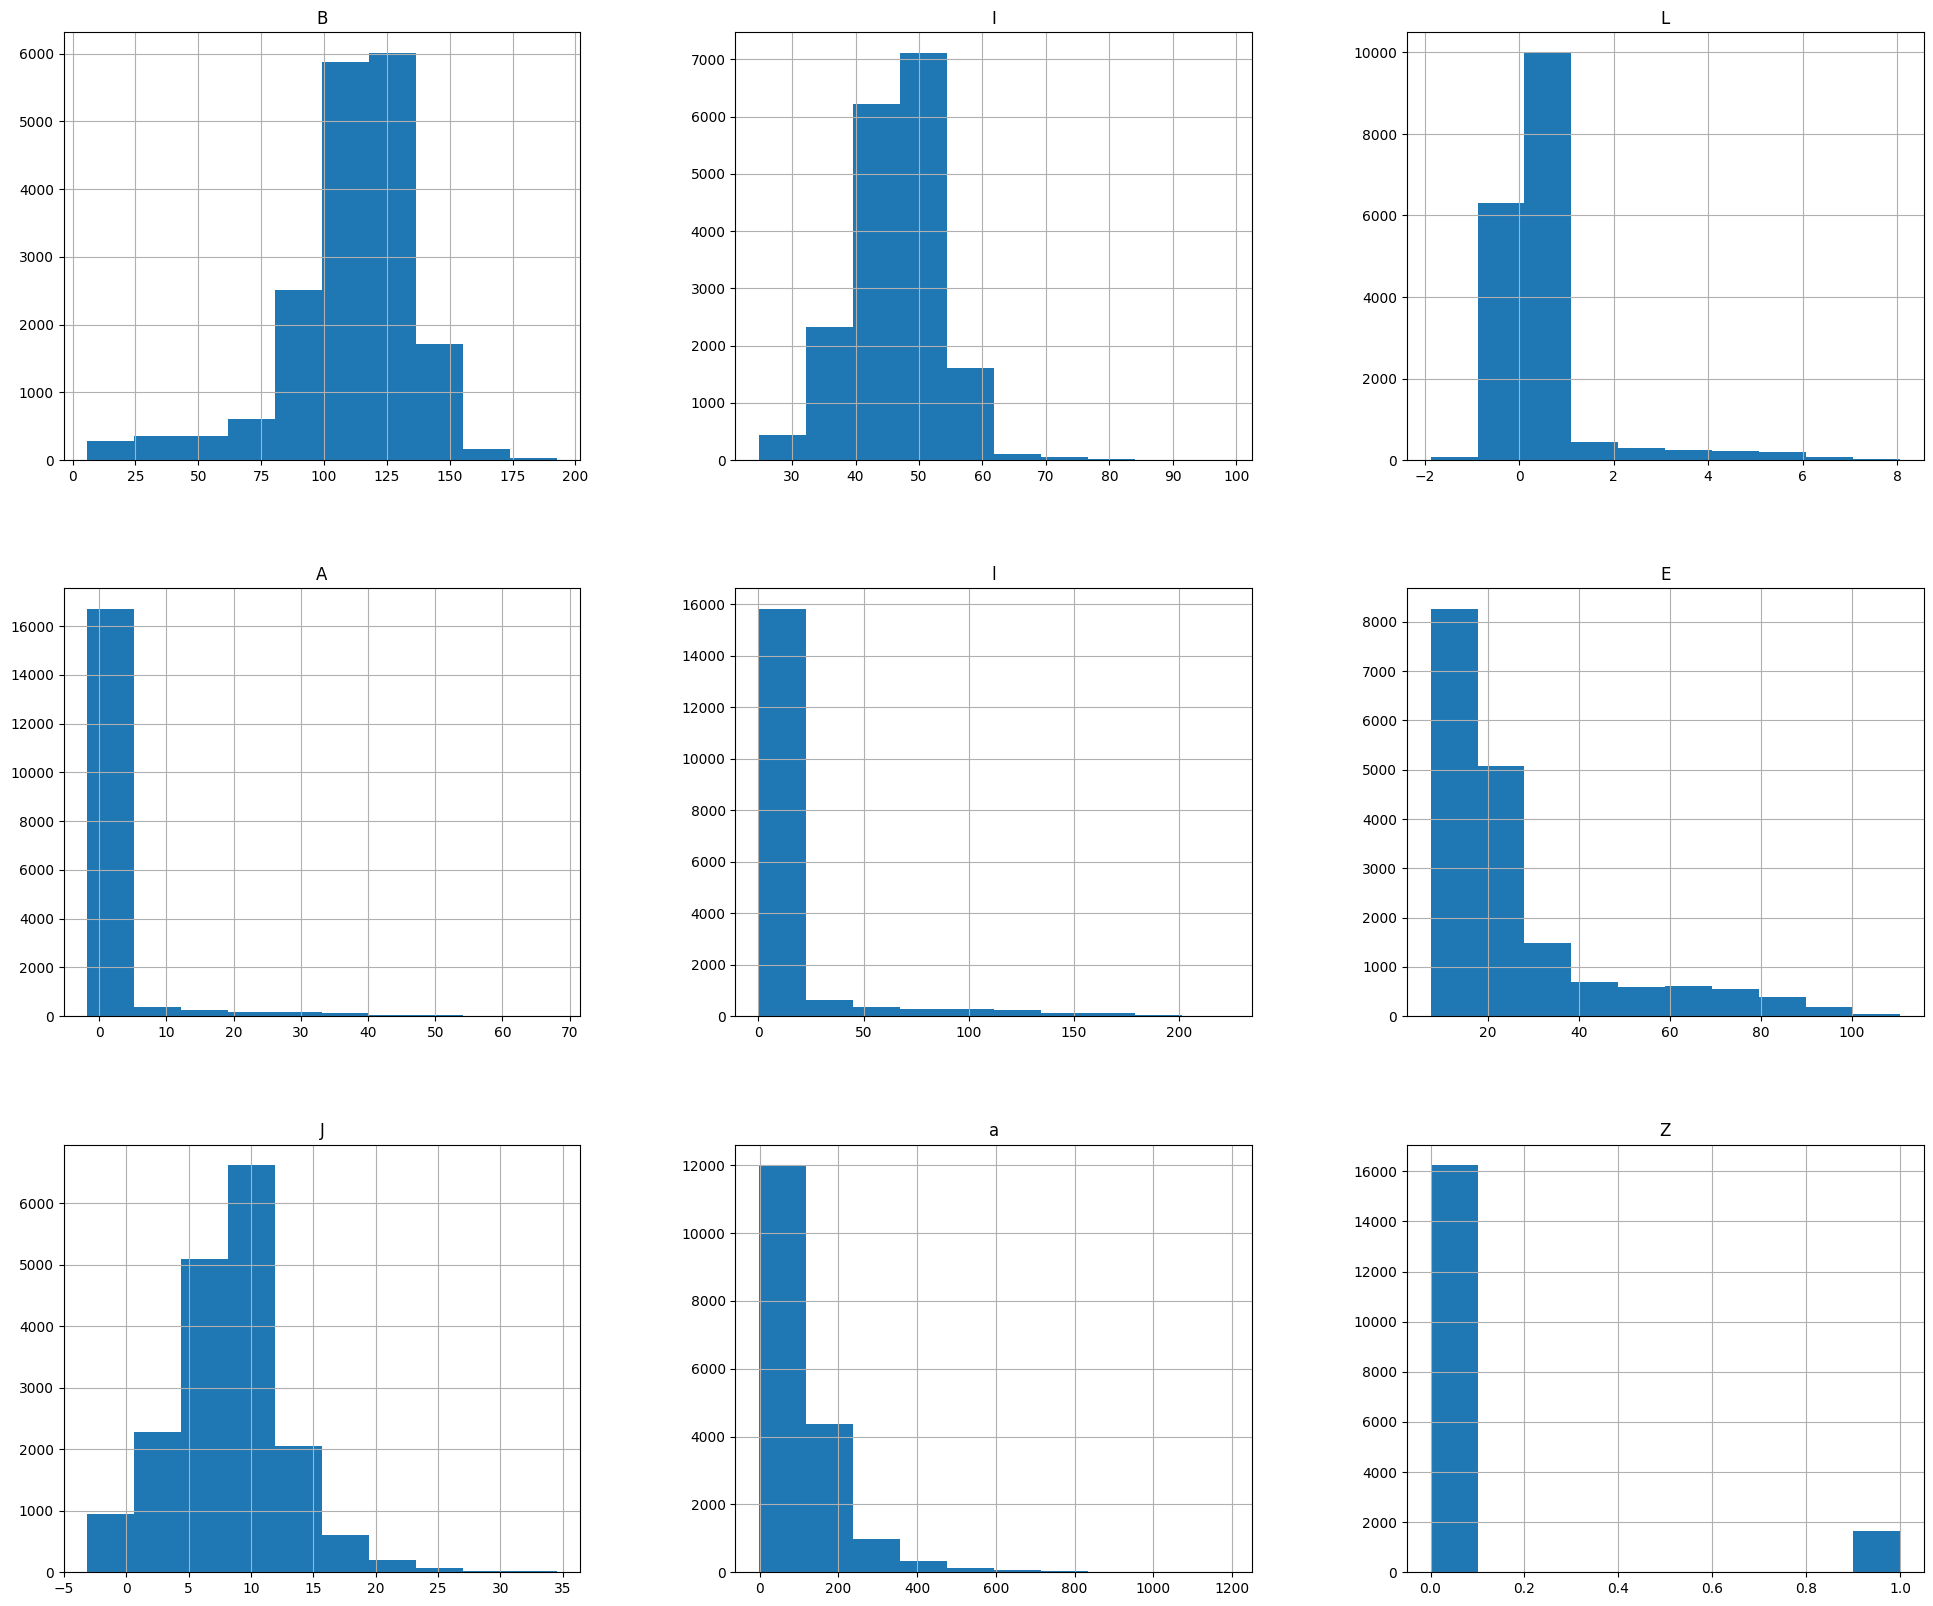

In [88]:
# plot histogram to check distribution



df.hist(figsize=(24,20))

plt.show()


In [91]:
#Seperate X input and y label

X=df[['B','I','L','A','l','E','J','a']]
y=df['Z']


In [92]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
# check the shape of X_train and X_test

print("X_train_shape:",X_train.shape)
print("X_test_shape:",X_test.shape)

X_train_shape: (11991, 8)
X_test_shape: (5907, 8)


In [93]:
# StandardScaler conversion on train and test data
from sklearn.preprocessing import StandardScaler

scaller=StandardScaler()

columns_scale=['B','I','L','A','l','E','J','a']

df[columns_scale]=scaller.fit_transform(df[columns_scale])

In [95]:
# convert into dataframe both train and test data
train_df = pd.DataFrame(data=X_train, columns=['B','I','L','A','l','E','J','a'])
train_df['Z'] = y_train

test_df = pd.DataFrame(data=X_test, columns=['B','I','L','A','l','E','J','a'])
test_df['Z'] = y_test

# Display the DataFrames
print("Train DataFrame:")
print(train_df)

print("\nTest DataFrame:")
print(test_df)


Train DataFrame:
                B          I         L          A         l          E  \
3680   111.109375  53.131064  0.280253  -0.222447  3.011706  20.355820   
13419  151.945312  47.973350 -0.250834   0.275367  2.115385  14.195484   
4514    52.335938  34.775008  2.478375  10.179171  8.230769  34.775947   
3598   121.562500  48.569498 -0.033391  -0.323514  2.595318  15.089924   
7044   133.664062  59.137852 -0.164198  -0.552877  1.542642  12.052034   
...           ...        ...       ...        ...       ...        ...   
11284  124.312500  53.179053 -0.012418  -0.556021  7.186455  29.308266   
11964  115.617188  46.784600  0.218177   0.226757  6.140468  30.271961   
5390   116.031250  43.213846  0.663456   0.433088  0.785117  11.628149   
860    135.664062  49.933749 -0.089940  -0.226726  3.859532  21.501505   
15795  120.726562  50.472256  0.346178   0.184797  0.769231  11.792603   

               J           a  Z  
3680    7.585482   62.383270  0  
13419  11.640297  173.5921

In [97]:
# import SVC classifier

from sklearn.svm import SVC
# import metrics to compute accuracy
from sklearn.metrics import accuracy_score

# instantiate classifier with default hyperparameters

classifier = SVC()
# fit classifier to training set

classifier.fit(X_train, y_train)
# make predictions on test set
y_pred = classifier.predict(X_test)

# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.9726


In [ ]:
# SVM with rbf and linear kernel with C=100.0

We get maximum accuracy with rbf and linear kernel with C=100.0. and the accuracy is 0.9832. Based on analysis we can conclude that our classification model accuracy is very good. Our model is doing a very good job in terms of predicting the class labels.

Confusion Matrix:[[5353   28]
 [ 134  392]]


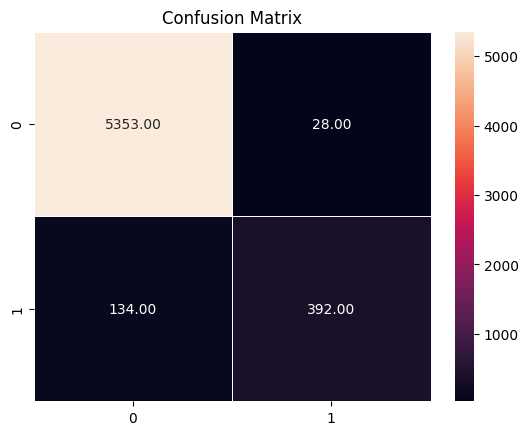

In [105]:
# confusion matrix
from sklearn.metrics import confusion_matrix

c_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
print(f"Confusion Matrix:{c_matrix}")


# Visualize the confusion matrix using a heatmap
sns.heatmap(c_matrix,annot=True, fmt=".2f", linewidths=.5)

plt.title('Confusion Matrix')
plt.show()


In [109]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)


# print classification accuracy
print(f'Classification Accuracy: {accuracy * 100}')

# print classification error

error = 1 - accuracy
print(f'Classification Error: {error * 100}')
# print precision and Recall score
print(f'Precision: {precision * 100}')
print(f'Recall: {recall * 100}')

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Classification Accuracy: 97.25749111223972
Classification Error: 2.7425088877602866
Precision: 93.33333333333333
Recall: 74.52471482889734
Recall or Sensitivity : 0.7452


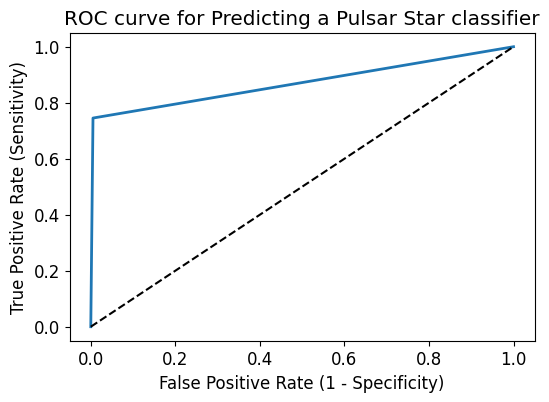

ROC AUC : 0.8700


In [112]:
# plot ROC Curve

from sklearn.metrics import roc_curve

# one line code here

plt.figure(figsize=(6,4))
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Predicting a Pulsar Star classifier')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()


# compute ROC AUC

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

In [ ]:
# calculate cross-validated ROC AUC

from sklearn.model_selection import cross_val_score

linear_svc = SVC(kernel='linear', probability=True)

Cross_validated_ROC_AUC = cross_val_score(linear_svc, X_train, y_train, cv=10, scoring='roc_auc').mean()


print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))